<a href="https://colab.research.google.com/github/WoradeeKongthong/ComputerVision/blob/master/Image_data_proparation_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load an image

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(901, 1200)


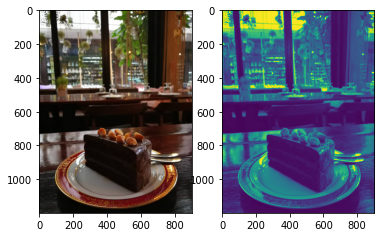

In [2]:
from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# load an image
img = load_img('cake.jpg')
gs_img = load_img('cake.jpg', color_mode='grayscale')

# details
print(type(img))
print(img.format)
print(img.mode)
print(img.size)

# show the image
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(gs_img)
plt.show()

# Convert an image

In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img

# load the Pillow image
img = load_img('cake.jpg')

# convert to numpy array
img_array = img_to_array(img)

# details
print('Pillow img to array')
print('img_array type : ',type(img_array))
print(img_array.dtype)
print(img_array.shape)

# convert back to image
img_pil = array_to_img(img_array)
print('\nArray to Pillow img')
print('img_pil type : ',type(img))

Pillow img to array
img_array type :  <class 'numpy.ndarray'>
float32
(1200, 901, 3)

Array to Pillow img
img_pil type :  <class 'PIL.JpegImagePlugin.JpegImageFile'>


# Save an image_array to .jpg file

<class 'PIL.Image.Image'>
None
RGB
(901, 1200)


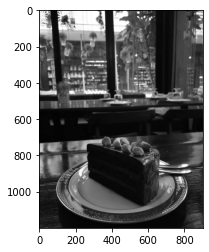

In [4]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array

# load image as grayscale
img = load_img('cake.jpg', color_mode='grayscale')

# convert image to a numpy array
img_array = img_to_array(img)

# save the image
save_img('cake_grayscale.jpg', img_array)

# load the image to confirm it was saved correctly
img = load_img('cake_grayscale.jpg')
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
plt.imshow(img)
plt.show()

# Pixel Scaling with `ImageDataGenerator` class
The usage of the `ImageDataGenerator` class is as follows
1.   Load dataset
2.   Configure the `ImageDataGenerator` (create a data generator)
3.   Calculate image statistics (fit())
4.   Use the generator to fit the model (fit_generator())
5.   Use the generator to evaluate the model (evaluate_generator())

11493376/11490434 [==============================] - 0s 0us/step
X_train shape :  (60000, 28, 28)
y_train shape :  (60000,)
X_test shape :  (10000, 28, 28)
y_test shape :  (10000,)

Sample image


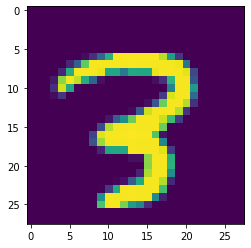


After reshape
X_train shape :  (60000, 28, 28, 1)
y_train shape :  (60000,)
X_test shape :  (10000, 28, 28, 1)
y_test shape :  (10000,)

X_train min : 0.000, max : 255.000
X_test min : 0.000, max : 255.000


In [5]:
# load keras mnist dataset
from keras.datasets import mnist
import random
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# summarize dataset details
print('X_train shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)

# print sample
num = random.randint(0,len(X_train))
print('\nSample image')
plt.imshow(X_train[num])
plt.show()

# reshape X to have 1 channel (dim : (sample, width, height, channel))
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],X_train.shape[2],1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))
print('\nAfter reshape')
print('X_train shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)

# Original pixels scale
print('\nX_train min : %.3f, max : %.3f' %(X_train.min(), X_train.max()))
print('X_test min : %.3f, max : %.3f' %(X_test.min(), X_test.max()))

## Normalizing a image dataset

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# create generator include normalization
datagen = ImageDataGenerator(rescale=1.0/255.0)

# create iterator to scale image
train_iterator = datagen.flow(X_train, y_train, batch_size=64)
test_iterator = datagen.flow(X_test, y_test, batch_size=64)

# number of batches
print('Number of training batches : ', len(train_iterator))
print('Number of test batches : ', len(test_iterator))

# confirm the scaling works
batchX, batchy = train_iterator.next()
print('batchX shape : ', batchX.shape)
print('batchX min :', batchX.min())
print('batchX max :', batchX.max())

Number of training batches :  938
Number of test batches :  157
batchX shape :  (64, 28, 28, 1)
batchX min : 0.0
batchX max : 1.0


## Centering Images (X-mean)
sample-wise : use mean of the image  
feature-wise : use mean of entire dataset

In [7]:
# summarize dataset details
print('X_train shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('X_train min : %.3f, max : %.3f' %(X_train.min(), X_train.max()))
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)
print('X_test min : %.3f, max : %.3f' %(X_test.min(), X_test.max()))

X_train shape :  (60000, 28, 28, 1)
y_train shape :  (60000,)
X_train min : 0.000, max : 255.000
X_test shape :  (10000, 28, 28, 1)
y_test shape :  (10000,)
X_test min : 0.000, max : 255.000


In [8]:
# create generator that centers pixel values
datagen = ImageDataGenerator(featurewise_center=True)

# calculate the mean on the training dataset
datagen.fit(X_train)
print('Data Generator mean : %.3f' %datagen.mean)

Data Generator mean : 33.318


In [9]:
# demonstrate on a single batch
iterator = datagen.flow(X_train, y_train, batch_size=64)
batchX, batchy = iterator.next()
print('batchX shape : ',batchX.shape)
print('batchX mean :', batchX.mean())

batchX shape :  (64, 28, 28, 1)
batchX mean : -1.2882943


In [10]:
# demonstrate on entire X_train
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train))
batchX, batchy = iterator.next()
print('batchX shape : ',batchX.shape)
print('batchX mean :', batchX.mean())

batchX shape :  (60000, 28, 28, 1)
batchX mean : -2.7737655e-05


## Standardize Images
centering at 0  
normalize at s.d.

In [11]:
# summarize dataset details
print('X_train shape : ',X_train.shape)
print('y_train shape : ',y_train.shape)
print('X_train min : %.3f, max : %.3f' %(X_train.min(), X_train.max()))
print('X_test shape : ',X_test.shape)
print('y_test shape : ',y_test.shape)
print('X_test min : %.3f, max : %.3f' %(X_test.min(), X_test.max()))

X_train shape :  (60000, 28, 28, 1)
y_train shape :  (60000,)
X_train min : 0.000, max : 255.000
X_test shape :  (10000, 28, 28, 1)
y_test shape :  (10000,)
X_test min : 0.000, max : 255.000


In [12]:
# create generator that centers and normalize pixel values
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)

# calculate the mean and sd
datagen.fit(X_train)

# print the result
print('Data Generator mean : %.3f' %datagen.mean)
print('Data Generator sd : %.3f' %datagen.std)

Data Generator mean : 33.318
Data Generator sd : 78.567


In [13]:
# demonstrate on a single batch
iterator = datagen.flow(X_train, y_train, batch_size=64)
batchX, batchy = iterator.next()
print('batchX shape : ',batchX.shape)
print('batchX mean :', batchX.mean())
print('batchX sd :', batchX.std())

batchX shape :  (64, 28, 28, 1)
batchX mean : -0.014509531
batchX sd : 0.98231447


In [14]:
# demonstrate on entire X_train
iterator = datagen.flow(X_train, y_train, batch_size=len(X_train))
batchX, batchy = iterator.next()
print('batchX shape : ',batchX.shape)
print('batchX mean :', batchX.mean())
print('batchX sd :', batchX.std())

batchX shape :  (60000, 28, 28, 1)
batchX mean : -3.4321766e-07
batchX sd : 1.000001


# Load Large dataset for Directory
Directory Structure  


In [15]:
from keras.preprocessing.image import ImageDataGenerator

# create generator
datagen = ImageDataGenerator( )

# create iterators for each dataset
train_iter = datagen.flow_from_directory('fruit/train/')
val_iter = datagen.flow_from_directory('fruit/val/')
test_iter = datagen.flow_from_directory('fruit/test/')

# confirm the iterator works in training set
batchX, batchy = train_iter.next()
print('Training batch')
print('X shape : ', batchX.shape)
print('y shape : ', batchy.shape)

Found 9 images belonging to 4 classes.
Found 9 images belonging to 4 classes.
Found 9 images belonging to 4 classes.
Training batch
X shape :  (9, 256, 256, 3)
y shape :  (9, 4)


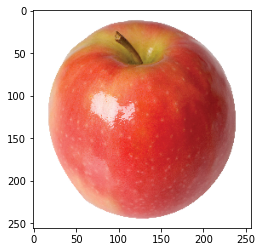

In [22]:
# print batchX image randomly
i = random.randint(0,len(batchX)-1)
plt.imshow(batchX[i].astype('uint8'))
plt.show()

In [23]:
# consider batchy
labels = train_iter.class_indices
print(labels)

{'.ipynb_checkpoints': 0, 'apple': 1, 'banana': 2, 'orange': 3}


# Image Data Augmentation
*   Horizontal and Vertical Shift
*   Horizontal and Vertical Flip
*   Rotation
*   Brightness
*   Zoom

samples array shape :  (1, 286, 336, 3)


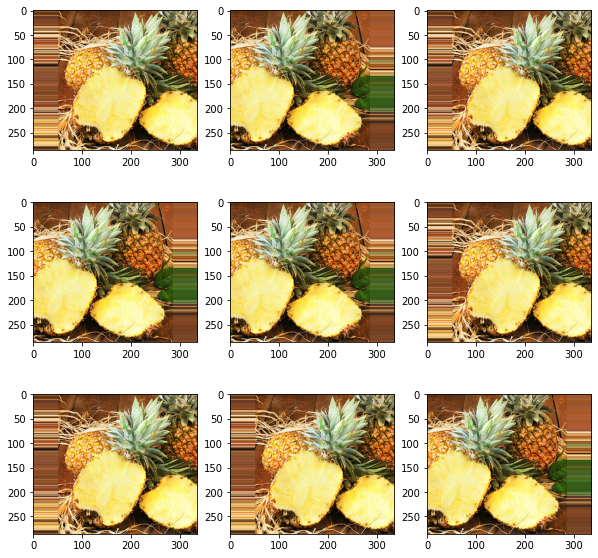

In [35]:
import numpy as np

# horizontal shift

# load the image
img = load_img('pineapple.jpg') 
# convert to numpy array
pixels = img_to_array(img)
# expand dimension to be one sample batch (resemble to reshape)
samples = np.expand_dims(pixels, 0)
print('samples array shape : ',samples.shape)

# create data generator with augmentation
datagen = ImageDataGenerator(width_shift_range=[-50,  50])

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

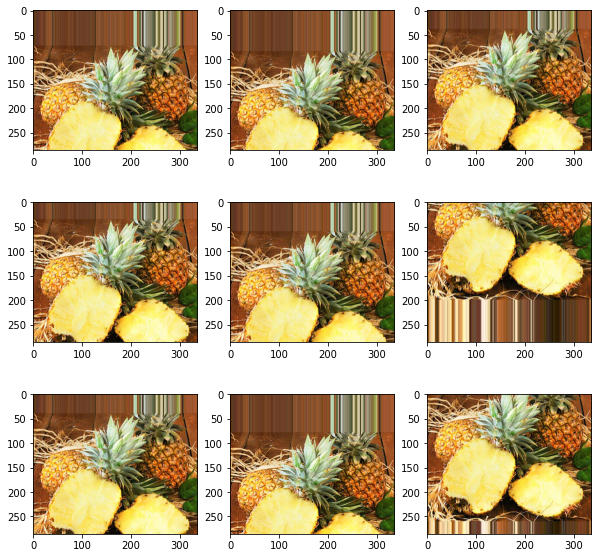

In [36]:
# vertical shift

# create data generator with augmentation
datagen = ImageDataGenerator(height_shift_range=0.3) # 30%

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

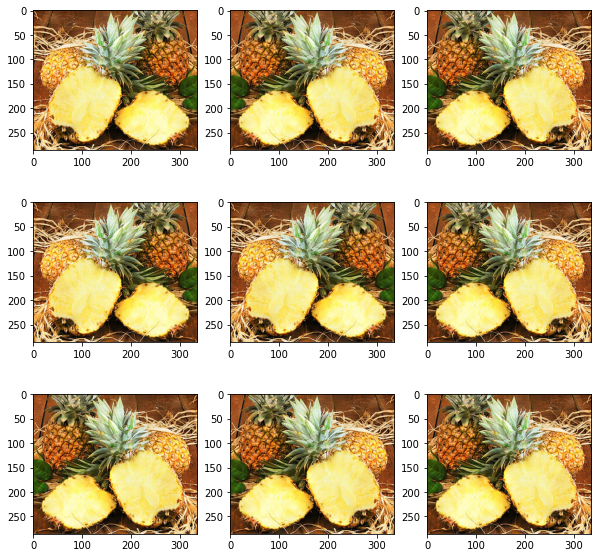

In [38]:
# Horizontal flip

# create data generator with augmentation
datagen = ImageDataGenerator(horizontal_flip=True)

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

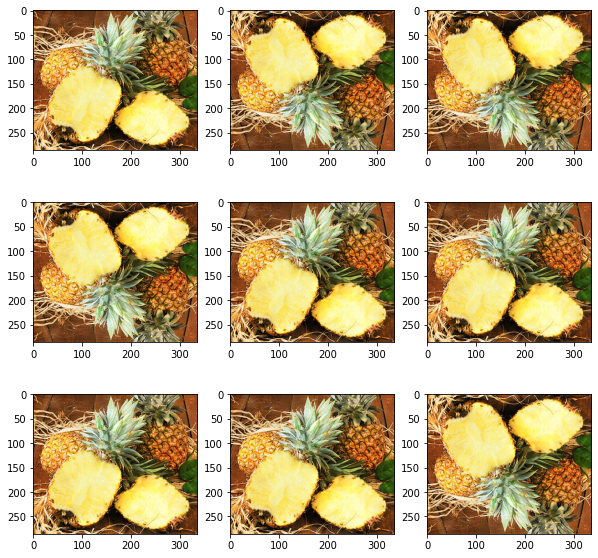

In [40]:
# vertical flip

# create data generator with augmentation
datagen = ImageDataGenerator(vertical_flip=True)

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

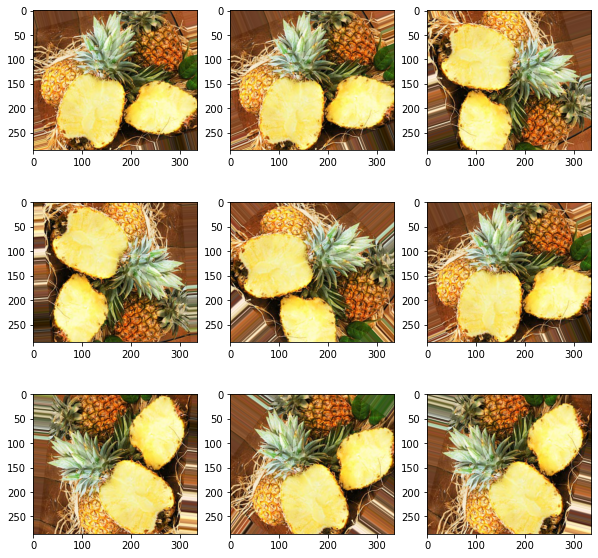

In [41]:
# Rotation Augmentation
# rotation_range can be 0 to 360 degrees

# create data generator with augmentation
datagen = ImageDataGenerator(rotation_range=90)

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

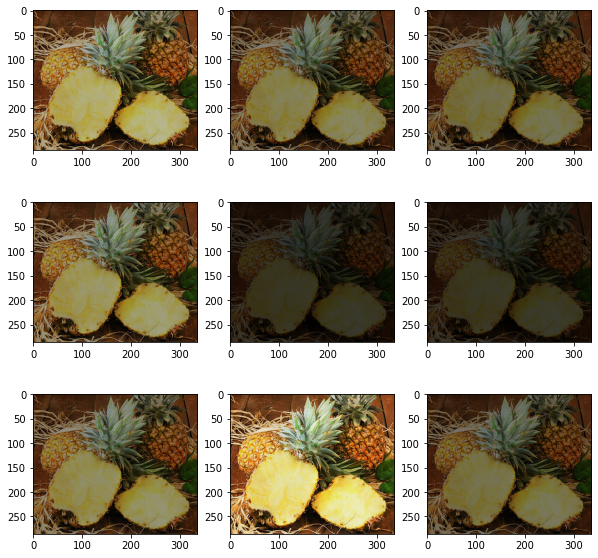

In [43]:
# Brightness Augmentation
# brightness_range < 1 : darker
# brightness_range = 1 : no effect
# brightness_range > 1 : brighter

# create data generator with augmentation
datagen = ImageDataGenerator(brightness_range=[0.2,1.0])

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

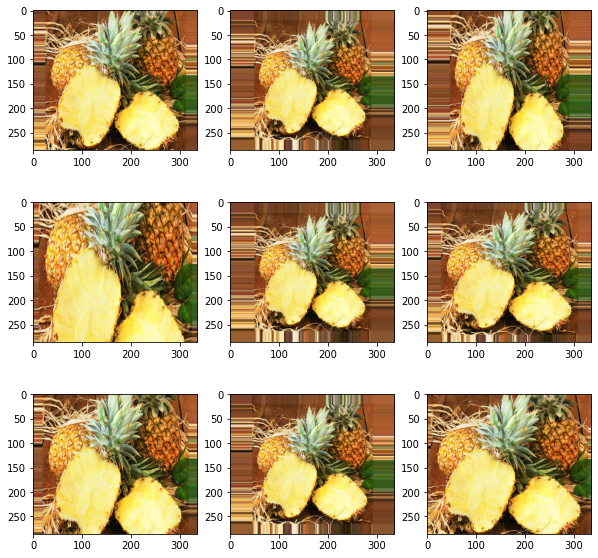

In [44]:
# Random Zoom Augmentation
# zoom_range < 1 : zoom in
# zoom_range > 1 : zoom out
# zoom_range = 0.3 : zoom in or out within 30% (70% - 130%)
# zoom_range = [0.7, 1.3]

# create data generator with augmentation
datagen = ImageDataGenerator(zoom_range=[0.5,1.5])

# create iterator
iter = datagen.flow(samples, batch_size=1)

# generate samples and plot
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(330+i+1)
  batch = iter.next()
  img_gen = batch[0].astype('uint8')
  plt.imshow(img_gen)
plt.show()

# Manipulating Image Channels

## Add a Channel to a Grayscale Image
1.   np.expand_dims()
2.   reshape()

<class 'PIL.Image.Image'>
None
RGB
(901, 1200)


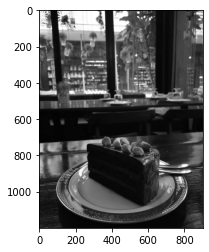

In [49]:
# load grayscale image
img = load_img('cake_grayscale.jpg')

# print details
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
plt.imshow(img)
plt.show()

L


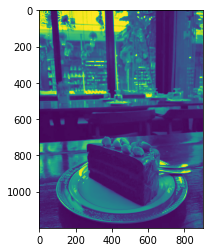

In [50]:
# convert the loaded image to grayscale
img = img.convert(mode='L')
print(img.mode)
plt.imshow(img)
plt.show()

In [51]:
# convert image to numpy array
pixels = np.asarray(img)
print(type(pixels))
print(pixels.shape)

<class 'numpy.ndarray'>
(1200, 901)


In [52]:
# add channels first
pixels_chfirst = np.expand_dims(pixels, axis=0)
print(pixels_chfirst.shape)

(1, 1200, 901)


In [53]:
# add channels last
pixels_chlast = np.expand_dims(pixels, axis=2)
print(pixels_chlast.shape)

(1200, 901, 1)


In [54]:
# or .reshape((...))
pixels_chlast = pixels.reshape((pixels.shape[0], pixels.shape[1], 1))
print(pixels_chlast.shape)

(1200, 901, 1)


## Change Image Channel Ordering

In [57]:
print(pixels_chfirst.shape)

# change channel first to channel last format
pixels_chlast = np.moveaxis(pixels_chfirst, 0, 2)
print(pixels_chlast.shape)

(1, 1200, 901)
(1200, 901, 1)


## Keras Default Channel Ordering
go to : /.keras/keras.json

In [58]:
from keras import backend
print(backend.image_data_format())

channels_last


In [ ]:
# change default channel ordering
# backend.set_image_data_format('channels_first')
# print(backend.image_data_format())

In [61]:
x = np.asarray([[[0]],[[1]],[[0]]])
print(x.shape)

(3, 1, 1)
